In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/human-oral-citizen'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### From:
Citizen science charts two major “stomatotypes” in the oral microbiome of adolescents and reveals links with habits and drinking water composition. 

Willis, J.R., González-Torres, P., Pittis, A.A., Bejarano, L.A., Cozzuto, L., Andreu-Somavilla, N., Alloza-Trabado, M., Valentín, A., Ksiezopolska, E., Onywera, H. and Montfort, M., 2018. 

Microbiome, 6(1), pp.1-17.

https://doi.org/10.1186/s40168-018-0592-3

In [11]:
dat=ca.read_amplicon('./all.biom','./map.joined.txt',normalize=10000,min_reads=1000)

2022-06-25 18:17:37 INFO loaded 1319 samples, 5093 features
2022-06-25 18:17:37 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-25 18:17:37 INFO After filtering, 1303 remain.


In [12]:
datc=dat.cluster_features(10)

2022-06-25 18:17:37 INFO After filtering, 3046 remain.


In [13]:
datc=datc.sort_samples('age')

In [14]:
datc.sample_metadata.host_occupation.value_counts()

Student    1281
Teacher      22
Name: host_occupation, dtype: int64

# Braces
## We do analysis paired on age (so comparison is only done on subjects with same age)

In [15]:
dd=datc.diff_abundance_paired('age','Braces2','braces','no braces',alpha=0.1,random_seed=2022)

2022-06-25 18:17:58 INFO Dropping 261 values with < 2 samples
2022-06-25 18:17:58 INFO 1039 samples with both values
2022-06-25 18:17:58 INFO After filtering, 2976 remain.
2022-06-25 18:17:58 INFO 287 samples with value 1 (['braces'])
2022-06-25 18:18:04 INFO number of higher in braces: 146. number of higher in no braces : 40. total 186


2022-06-25 18:18:08 INFO Getting dbBact annotations for 186 sequences, please wait...
2022-06-25 18:18:08 INFO Limited to maximal annotationid: 7440
2022-06-25 18:18:27 INFO got 2292 annotations
2022-06-25 18:18:28 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-25 18:18:28 INFO Got 10852 annotation-sequence pairs
2022-06-25 18:18:28 INFO Added annotation data to experiment. Total 2292 annotations, 186 ASVs
2022-06-25 18:18:30 INFO Found 1 experiments ([598]) matching current experiment - ignoring them.
2022-06-25 18:18:34 INFO found 7 negative
2022-06-25 18:18:36 INFO found 7 positive


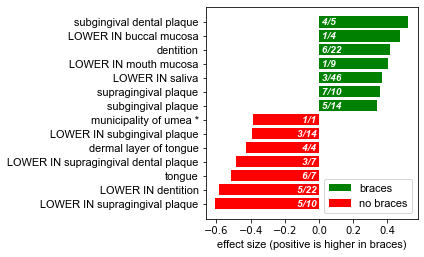

In [16]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [17]:
f.figure.savefig('./fig-terms-braces.pdf')

In [18]:
e.save('./table-terms-braces')

2022-06-25 18:18:37 INFO Metadata field taxonomy not found. Saving biom table without metadata


# salivary pH correlation

In [16]:
dd=datc.correlation('pH.Saliva',random_seed=2022)

2022-06-24 16:39:50 INFO After filtering, 3046 remain.
2022-06-24 16:39:50 WARNING NaN values encountered in labels for correlation. Ignoring these samples
2022-06-24 16:39:53 INFO Positive correlated features : 45. Negative correlated features : 79. total 124


2022-06-24 16:40:00 INFO Getting dbBact annotations for 124 sequences, please wait...
2022-06-24 16:40:00 INFO Limited to maximal annotationid: 7440
2022-06-24 16:40:06 INFO got 2031 annotations
2022-06-24 16:40:06 WARNING ignoring 0 annotation with id > max_id 7440
2022-06-24 16:40:06 INFO Got 9806 annotation-sequence pairs
2022-06-24 16:40:06 INFO Added annotation data to experiment. Total 2031 annotations, 124 ASVs
2022-06-24 16:40:07 INFO Found 1 experiments ([598]) matching current experiment - ignoring them.
2022-06-24 16:40:08 INFO found 5 negative
2022-06-24 16:40:08 INFO found 7 positive


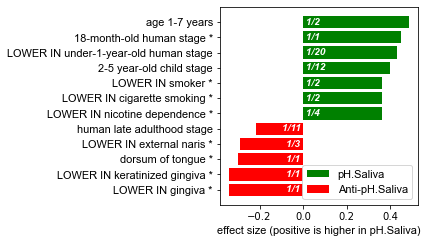

In [17]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [18]:
f.figure.savefig('./fig-terms-ph.pdf')

In [19]:
e.save('./table-ph')

2022-06-24 16:40:09 INFO Metadata field taxonomy not found. Saving biom table without metadata


In [ ]:
cu.splot(dd,'pH.Saliva')

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


2022-05-23 10:18:20 INFO Getting dbBact annotations for 124 sequences, please wait...
2022-05-23 10:18:25 INFO got 2028 annotations
2022-05-23 10:18:25 INFO Got 9790 annotation-sequence pairs
2022-05-23 10:18:25 INFO Added annotation data to experiment. Total 2028 annotations, 124 ASVs
2022-05-23 10:18:26 INFO Found 1 experiments ([598]) matching current experiment - ignoring them.
